In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  False
Tensorflow Version:  2.4.1
Keras Version:  2.4.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/'Colab Notebooks'/Kaggle



kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Kaggle"

In [ ]:

!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

 95% 27.0M/28.4M [00:00<00:00, 48.5MB/s]
100% 28.4M/28.4M [00:00<00:00, 70.2MB/s]


In [ ]:
!kaggle datasets download -d andrewmvd/fruit-detection

 92% 47.0M/51.3M [00:00<00:00, 45.7MB/s]
100% 51.3M/51.3M [00:00<00:00, 87.1MB/s]


In [ ]:

!kaggle config view

Configuration values from /content/gdrive/MyDrive/Colab Notebooks/Kaggle
- username: ayush2104
- path: None
- proxy: None
- competition: None


In [ ]:
train_df = pd.read_csv('Train.csv')
# display a sneak peek of the data
train_df.head()

In [ ]:

print(f'Number of classes: {train_df.ClassId.unique().shape[0]}')

Number of classes: 40

In [ ]:
train_df['Label'] = train_df['ClassId'].replace(sorted(train_df['ClassId'].unique()), labels)
# print updated df
train_df.head()

	Width	Height	Roi.X1	Roi.Y1	Roi.X2	Roi.Y2	ClassId	Path	Label
0	27	26	5	5	22	20	20	Train/20/00020_00000_00000.png	Turn right
1	28	27	5	6	23	22	20	Train/20/00020_00000_00001.png	Turn right
2	29	26	6	5	24	21	20	Train/20/00020_00000_00002.png	Turn right
3	28	27	5	6	23	22	20	Train/20/00020_00000_00003.png	Turn right
4	28	26	5	5	23	21	20	Train/20/00020_00000_00004.png	Turn right

In [ ]:

base_dir = '/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train'
print(base_dir)

In [ ]:
batch_size = 32
img_height = 28 #180
img_width = 28 #180

In [ ]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 40 classes.
Using 31368 files for training.

In [ ]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']

In [ ]:
len(labels)

40

In [ ]:

labels[int(class_names[0])] 

24 km/h

In [ ]:

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    classid=groundlabels[i].numpy()
    print(classid)
    plt.title(labels[classid])
    plt.axis("off")

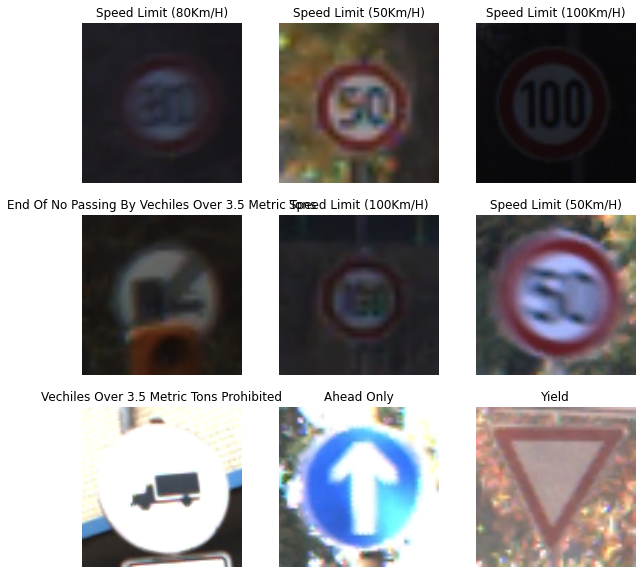

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32,)

In [ ]:
image_batch

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[103.61607 ,  93.42857 ,  81.459816],
         [ 93.55357 , 109.79464 , 109.30357 ],
         [140.75446 , 117.55357 , 116.5759  ],
         ...,
         [ 67.49552 ,  57.71874 ,  45.013386],
         [ 79.553566,  68.848206,  51.303574],
         [ 87.102684,  80.04912 ,  55.29018 ]],

        [[ 96.72768 , 113.4375  , 104.28572 ],
         [ 69.90179 ,  87.01785 ,  88.03571 ],
         [172.52232 , 151.64285 , 150.34375 ],
         ...,
         [ 72.79463 ,  59.01339 ,  42.3125  ],
         [ 77.56697 ,  62.852676,  41.638397],
         [ 95.28126 ,  83.75    ,  59.3884  ]],

        [[173.35268 , 155.15625 , 147.5982  ],
         [135.05803 , 103.4241  ,  97.06696 ],
         [113.803566, 124.58035 , 115.21875 ],
         ...,
         [ 80.70088 ,  71.13839 ,  50.000004],
         [ 80.566986,  65.13394 ,  36.35717 ],
         [ 76.28125 ,  64.9375  ,  42.544647]],

        ...,

        [[ 59.450893,  51.245537,  41.245537],
         [ 62.361607,  49.53125 ,  39.53125 ],
         [ 58.915176,  52.901787,  43.745537],
         ...,
          [ 39.504463,  35.665176,  31.549107],
         [ 41.062496,  37.36607 ,  32.875   ],
         [ 36.74107 ,  33.58482 ,  29.83482 ]],

        [[ 59.82589 ,  50.714287,  42.120537],
         [ 56.392857,  49.21875 ,  40.09375 ],
         [ 55.35268 ,  50.308033,  41.183033],
         ...,
         [ 33.379463,  30.415176,  26.299107],
         [ 34.21875 ,  32.11607 ,  28.343748],
         [ 33.803574,  30.61607 ,  28.272322]],

        [[ 54.32143 ,  47.584824,  39.566967],
         [ 47.450893,  43.65625 ,  35.142857],
         [ 41.660713,  44.03125 ,  35.669643],
         ...,
         [ 37.571426,  33.924107,  30.513393],
         [ 34.468765,  32.06697 ,  26.870546],
         [ 37.18304 ,  34.607147,  31.062504]]],


       [[[197.86098 , 214.40465 , 238.45631 ],
         [200.24394 , 216.08324 , 238.49362 ],
         [200.26244 , 216.10172 , 238.00415 ],
         ...,
         [192.61798 , 208.3667  , 228.95056 ],
         [195.08322 , 210.88681 , 231.80357 ],
         [196.13487 , 209.29561 , 228.45631 ]],

        [[198.47034 , 212.50606 , 238.02391 ],
         [198.03572 , 212.3039  , 236.60777 ],
         [200.0303  , 214.16072 , 235.94101 ],
         ...,
         [186.92696 , 205.30898 , 226.6591  ],
         [195.53508 , 210.49936 , 230.74904 ],
         [196.94675 , 209.26817 , 227.58961 ]],

        [[199.69771 , 211.89413 , 236.89413 ],
         [198.93718 , 210.84088 , 235.26402 ],
         [199.5542  , 210.33994 , 233.33994 ],
         ...,
         [187.90144 , 203.57141 , 222.12212 ],
         [195.10873 , 208.88202 , 228.49458 ],
         [194.55357 , 206.74586 , 225.74171 ]],

        ...,

        [[ 19.705996,  21.71014 ,  27.549425],
         [ 19.67857 ,  20.583864,  25.583864],
         [ 19.550697,  20.35427 ,  25.35427 ],
         ...,
         [ 20.536337,  19.33991 ,  21.669956],
         [ 20.746159,  20.16931 ,  21.956615],
         [ 25.269114,  26.108397,  30.230522]],

        [[ 21.065687,  22.874998,  28.797512],
         [ 21.517857,  22.035713,  27.303888],
         [ 21.619577,  21.619577,  26.619577],
         ...,
         [ 24.924759,  23.849499,  22.993942],
         [ 22.98023 ,  23.8007  ,  27.64094 ],
         [ 24.857147,  25.862886,  28.838661]],

        [[ 19.34727 ,  19.507986,  25.507986],
         [ 17.071766,  17.559647,  23.077505],
         [ 15.482164,  15.647024,  19.9726  ],
         ...,
         [ 17.704737,  18.989155,  20.67313 ],
         [ 15.85684 ,  21.231514,  26.630106],
         [ 17.238207,  18.668697,  23.58547 ]]],


       [[[138.88489 , 116.998085, 101.89892 ],
         [116.39286 ,  92.42284 ,  75.79784 ],
         [103.26372 ,  76.14286 ,  68.76785 ],
         ...,
         [157.37628 , 126.32143 , 117.31728 ],
         [157.73851 , 124.434944, 114.238525],
         [149.90277 , 106.027794,  97.86708 ]],

        [[138.53029 , 111.91741 ,  97.078125],
         [118.751915,  94.485016,  78.591835],
         [103.734375,  78.60938 ,  71.716515],
         ...,
         [157.77327 , 129.16231 , 120.68017 ],
         [159.23245 , 124.12532 , 115.62469 ],
         [150.65468 , 104.976135,  99.38078 ]],

        [[119.269455, 104.18272 ,  91.18272 ],
         [112.331635,  92.32685 ,  78.023285],
         [100.63074 ,  76.82717 ,  70.610016],
         ...,
         [156.94356 , 128.47354 , 118.182076],
         [160.02869 , 124.689415, 116.207275],
         [151.73631 , 105.82562 , 101.85718 ]],

        ...,

        [[247.73341 , 244.51913 , 221.53284 ],
         [180.4783  , 150.83545 , 118.84789 ],
         [121.03285 ,  87.46142 ,  75.71142 ],
         ...,
         [145.22066 , 118.59279 , 113.2771  ],
         [146.08452 , 119.92857 , 113.70887 ],
          [139.55203 , 116.88873 , 110.44644 ]],

        [[247.83386 , 244.7028  , 223.1671  ],
         [180.55229 , 151.42729 , 121.1773  ],
         [121.57686 ,  88.10715 ,  77.67857 ],
         ...,
         [146.98056 , 119.20728 , 112.98757 ],
         [134.90436 , 113.80039 , 109.33674 ],
         [108.17131 , 106.28542 , 103.59505 ]],

        [[247.04176 , 243.9882  , 223.9088  ],
         [178.9815  , 150.7433  , 121.84471 ],
         [122.65115 ,  89.44101 ,  78.82015 ],
         ...,
         [144.38586 , 118.19358 , 110.58229 ],
         [103.85279 ,  91.80015 ,  85.722664],
         [ 55.84966 ,  80.77651 ,  78.346016]]],


       ...,


       [[[178.125   , 203.05357 , 250.07143 ],
         [179.6808  , 205.51785 , 244.08035 ],
         [180.7924  , 206.75446 , 239.59375 ],
         ...,
         [ 82.698654,  83.50893 ,  87.497765],
         [ 94.86829 ,  97.93972 , 105.01561 ],
         [105.171974, 113.029106, 121.84163 ]],

        [[179.404   , 203.95758 , 243.7232  ],
         [176.5692  , 201.90848 , 241.96428 ],
         [180.02008 , 205.39508 , 246.25447 ],
         ...,
         [ 68.59375 ,  65.154015,  74.67856 ],
         [ 68.83928 ,  76.52454 ,  67.734375],
         [ 71.573685,  80.59601 ,  92.968796]],

        [[151.26785 , 178.76785 , 190.41295 ],
         [166.33035 , 190.15402 , 225.91965 ],
         [162.59822 , 183.34822 , 222.41518 ],
         ...,
         [ 64.98437 ,  61.444187,  85.24105 ],
         [ 58.919636,  65.29017 ,  67.377235],
         [ 51.66302 ,  54.74341 ,  63.51802 ]],
         ...,

        [[ 39.651787,  40.33259 ,  45.636158],
         [ 37.68527 ,  41.89955 ,  50.86384 ],
         [ 32.910713,  39.392857,  49.725445],
         ...,
         [ 34.93973 ,  38.125   ,  46.453125],
         [ 34.078125,  37.089287,  45.839287],
         [ 34.03349 ,  35.44198 ,  46.28128 ]],

        [[ 39.44866 ,  39.75    ,  46.142857],
         [ 34.97545 ,  39.078125,  46.839287],
         [ 34.743305,  40.100445,  49.035713],
         ...,
         [ 34.875   ,  38.      ,  46.06473 ],
         [ 34.703125,  37.714287,  44.48661 ],
         [ 33.85938 ,  36.696434,  43.82368 ]],

        [[ 35.410713,  37.72768 ,  44.685265],
         [ 34.089287,  39.066963,  44.49777 ],
         [ 36.91518 ,  41.59152 ,  49.375   ],
         ...,
         [ 34.517857,  38.71205 ,  47.191963],
         [ 33.71652 ,  38.180805,  43.5067  ],
         [ 35.      ,  37.071434,  44.017868]]],


       [[[119.383934, 141.6384  , 174.0491  ],
         [118.96429 , 140.76785 , 173.2143  ],
         [119.97768 , 143.56696 , 176.75893 ],
         ...,
         [146.32143 , 158.6607  , 191.2143  ],
         [145.78572 , 158.59822 , 187.58037 ],
         [144.6875  , 159.94643 , 187.19197 ]],

        [[123.39286 , 140.78572 , 173.9375  ],
         [121.25893 , 141.41518 , 173.2366  ],
         [118.37947 , 141.0625  , 172.90625 ],
         ...,
         [143.87946 , 157.875   , 188.71875 ],
         [139.99554 , 157.15625 , 186.4375  ],
         [137.23215 , 157.96875 , 185.3616  ]],

        [[127.45536 , 145.19196 , 178.875   ],
         [121.10268 , 141.82143 , 174.6741  ],
         [122.56696 , 141.84375 , 173.75    ],
         ...,
         [138.7857  , 153.5625  , 181.84375 ],
         [140.55804 , 155.96875 , 185.8125  ],
         [133.35715 , 153.75    , 182.89285 ]],

        ...,

        [[ 95.7366  , 118.1384  , 147.22322 ],
         [ 98.415184, 114.94643 , 145.0491  ],
         [ 96.63393 , 115.4509  , 145.20981 ],
         ...,
         [100.27679 , 121.19196 , 149.35715 ],
         [103.46428 , 124.54018 , 155.43303 ],
         [105.62054 , 124.8884  , 153.45535 ]],

        [[ 95.20536 , 118.10715 , 148.06696 ],
         [ 94.35268 , 116.38393 , 147.20537 ],
         [ 97.383934, 115.4509  , 145.20981 ],
         ...,
         [102.77679 , 122.84821 , 150.2009  ],
         [102.58928 , 122.94643 , 155.43303 ],
         [102.62053 , 120.66964 , 150.9866  ]],

        [[ 93.87054 , 114.      , 143.6384  ],
         [ 94.625   , 114.41965 , 144.4866  ],
         [ 94.74554 , 114.98661 , 146.3259  ],
         ...,
         [102.87054 , 122.94196 , 149.66518 ],
         [ 98.86161 , 120.55357 , 151.6741  ],
         [100.30357 , 121.41964 , 151.31697 ]]],


       [[[135.59949 , 113.17091 , 104.78571 ],
         [143.29848 , 119.89796 , 110.57909 ],
         [143.63011 , 114.11479 , 106.22194 ],
         ...,
         [140.21176 , 114.058685, 103.32655 ],
         [ 71.63267 ,  60.280624,  50.76276 ],
         [ 71.630104,  56.979603,  56.362263]],

        [[136.25256 , 112.86479 , 104.97449 ],
         [139.33418 , 116.58418 , 109.08929 ],
         [139.01021 , 112.446434, 105.82398 ],
         ...,
         [126.3036  , 109.91583 ,  95.24748 ],
         [ 79.4847  ,  66.83419 ,  51.005104],
         [ 96.82902 ,  73.191284,  69.31374 ]],

        [[133.92093 , 115.688774, 106.755104],
         [143.20663 , 118.79592 , 111.57653 ],
         [140.20154 , 110.78572 , 104.64286 ],
         ...,
         [136.94385 , 113.53314 , 100.306114],
         [116.6199  , 100.72449 ,  85.55102 ],
         [108.21684 ,  90.13011 ,  83.45919 ]],

        ...,

        [[149.89287 , 122.890305, 108.32909 ],
         [163.98216 , 140.00002 , 125.30868 ],
         [183.51787 , 153.6148  , 138.86226 ],
         ...,
         [153.9974  , 115.57141 , 106.303566],
         [139.5153  , 108.44388 ,  93.62246 ],
         [ 92.90831 ,  68.844536,  57.099606]],

        [[170.5867  , 143.72191 , 131.4464  ],
         [180.77296 , 152.33673 , 143.10968 ],
         [155.36745 , 130.57149 , 114.34445 ],
         ...,
         [153.67851 , 115.586716, 104.227036],
         [136.19133 , 106.579094,  91.27552 ],
         [101.88023 ,  73.9134  ,  61.691425]],

        [[160.55362 , 140.59697 , 126.50259 ],
         [143.07658 , 123.132675, 103.17351 ],
         [170.83913 , 164.78047 , 156.28046 ],
         ...,
         [147.95404 , 110.109695,  99.025505],
         [139.69386 , 108.95152 ,  96.35203 ],
         [109.39807 ,  77.07666 ,  65.79346 ]]]], dtype=float32)>


In [ ]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#There are two ways to use this layer. You can apply it to the dataset by calling map:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.034356536 0.401046733

**For Training the model**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
981/981 [==============================] - 19s 15ms/step - loss: 4.0212 - accuracy: 0.2494 - val_loss: 1.0160 - val_accuracy: 0.7148
Epoch 2/20
981/981 [==============================] - 3s 3ms/step - loss: 0.7914 - accuracy: 0.7689 - val_loss: 0.4943 - val_accuracy: 0.8683
Epoch 3/20
981/981 [==============================] - 3s 3ms/step - loss: 0.4002 - accuracy: 0.8893 - val_loss: 0.3191 - val_accuracy: 0.9237
Epoch 4/20
981/981 [==============================] - 3s 3ms/step - loss: 0.3008 - accuracy: 0.9168 - val_loss: 0.3722 - val_accuracy: 0.9043
Epoch 5/20
981/981 [==============================] - 3s 3ms/step - loss: 0.2245 - accuracy: 0.9412 - val_loss: 0.2935 - val_accuracy: 0.9325
Epoch 6/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1920 - accuracy: 0.9517 - val_loss: 0.2509 - val_accuracy: 0.9410
Epoch 7/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1895 - accuracy: 0.9506 - val_loss: 0.2934 - val_accuracy: 0.9370
Epoch 8/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1710 - accuracy: 0.9560 - val_loss: 0.2746 - val_accuracy: 0.9329
Epoch 9/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1526 - accuracy: 0.9608 - val_loss: 0.1651 - val_accuracy: 0.9631
Epoch 10/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1248 - accuracy: 0.9666 - val_loss: 0.2265 - val_accuracy: 0.9509
Epoch 11/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1302 - accuracy: 0.9658 - val_loss: 0.1880 - val_accuracy: 0.9591
Epoch 12/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1042 - accuracy: 0.9736 - val_loss: 0.2665 - val_accuracy: 0.9429
Epoch 13/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1175 - accuracy: 0.9680 - val_loss: 0.1720 - val_accuracy: 0.9596
Epoch 14/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1135 - accuracy: 0.9715 - val_loss: 0.2174 - val_accuracy: 0.9568
Epoch 15/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1104 - accuracy: 0.9723 - val_loss: 0.1616 - val_accuracy: 0.9674
Epoch 16/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1154 - accuracy: 0.9715 - val_loss: 0.2287 - val_accuracy: 0.9537
Epoch 17/20
981/981 [==============================] - 3s 3ms/step - loss: 0.0946 - accuracy: 0.9762 - val_loss: 0.2933 - val_accuracy: 0.9432
Epoch 18/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1209 - accuracy: 0.9710 - val_loss: 0.1778 - val_accuracy: 0.9659
Epoch 19/20
981/981 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.9787 - val_loss: 0.2171 - val_accuracy: 0.9580
Epoch 20/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1013 - accuracy: 0.9764 - val_loss: 0.1893 - val_accuracy: 0.9685



In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

plot_history(history, 'accuracy', 'val_accuracy')

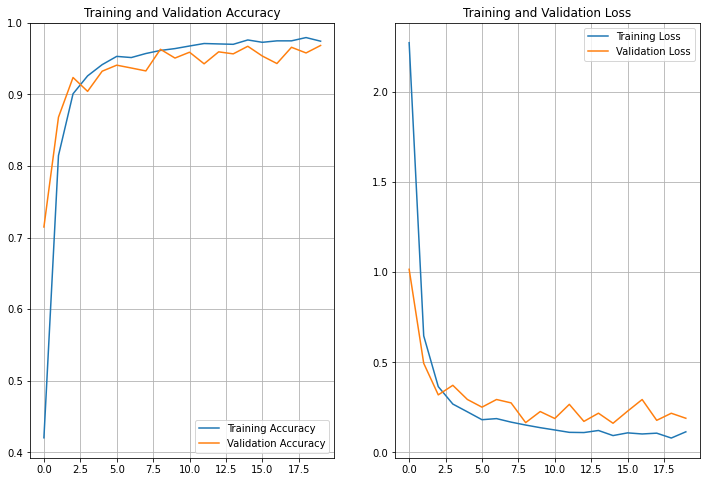

**Transfer Learning**


In [ ]:
base_dir = '/content/datasets/layover/traffic-sign-sybols/Train'
print(base_dir)

In [ ]:
batch_size = 32
img_height = 160 #180
img_width = 160 #180

In [ ]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:

class_names = train_ds.class_names
print(class_names)


['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']

In [ ]:

labels = ['10 km/h', '20 km/h', '30 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'No entry',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']

In [ ]:

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

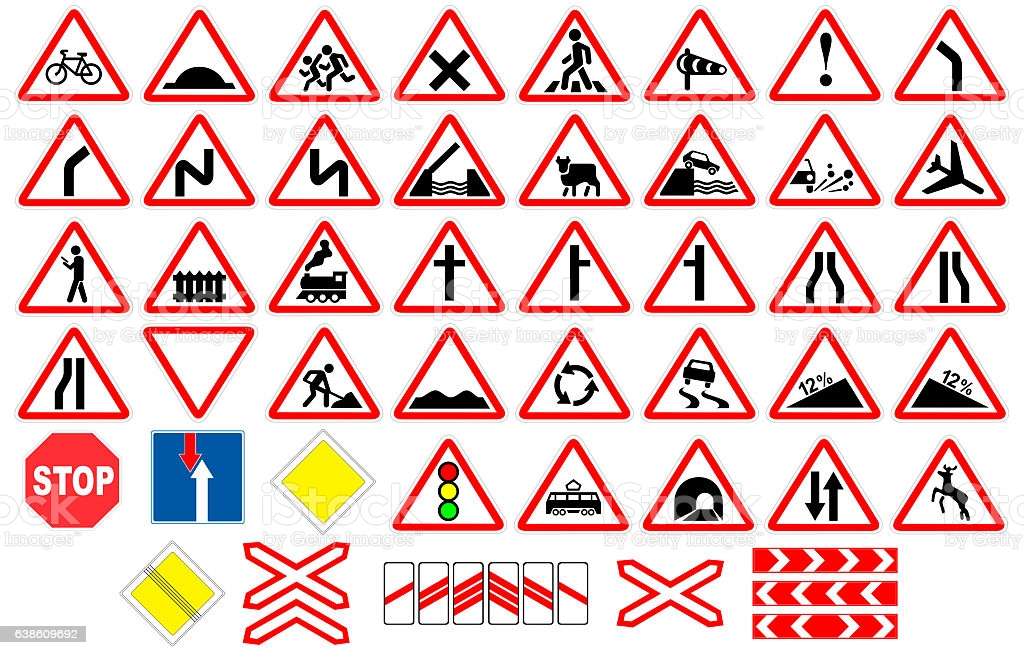

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
IMG_SIZE = (img_height, img_width)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_160_no_top.h5
9412608/9406464 [==============================] - 0s 0us/step

In [ ]:

IMG_SHAPE

(160, 160, 3)

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)


(32, 5, 5, 1280)

In [ ]:
base_model.trainable = False


In [ ]:
base_model.summary()


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_conv_depthwise (Depthw (None, 80, 80, 32)   288         Conv1_relu[0][0]                 
__________________________________________________________________________________________________
expanded_conv_depthwise_BN (Bat (None, 80, 80, 32)   128         expanded_conv_depthwise[0][0]    
__________________________________________________________________________________________________
expanded_conv_depthwise_relu (R (None, 80, 80, 32)   0           expanded_conv_depthwise_BN[0][0] 
__________________________________________________________________________________________________
expanded_conv_project (Conv2D)  (None, 80, 80, 16)   512         expanded_conv_depthwise_relu[0][0
__________________________________________________________________________________________________
expanded_conv_project_BN (Batch (None, 80, 80, 16)   64          expanded_conv_project[0][0]      
__________________________________________________________________________________________________
block_1_expand (Conv2D)         (None, 80, 80, 96)   1536        expanded_conv_project_BN[0][0]   
__________________________________________________________________________________________________
block_1_expand_BN (BatchNormali (None, 80, 80, 96)   384         block_1_expand[0][0]             
__________________________________________________________________________________________________
block_1_expand_relu (ReLU)      (None, 80, 80, 96)   0           block_1_expand_BN[0][0]          
__________________________________________________________________________________________________
block_1_pad (ZeroPadding2D)     (None, 81, 81, 96)   0           block_1_expand_relu[0][0]        
__________________________________________________________________________________________________
block_1_depthwise (DepthwiseCon (None, 40, 40, 96)   864         block_1_pad[0][0]                
__________________________________________________________________________________________________
block_1_depthwise_BN (BatchNorm (None, 40, 40, 96)   384         block_1_depthwise[0][0]          
__________________________________________________________________________________________________
block_1_depthwise_relu (ReLU)   (None, 40, 40, 96)   0           block_1_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_1_project (Conv2D)        (None, 40, 40, 24)   2304        block_1_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_1_project_BN (BatchNormal (None, 40, 40, 24)   96          block_1_project[0][0]            
__________________________________________________________________________________________________
block_2_expand (Conv2D)         (None, 40, 40, 144)  3456        block_1_project_BN[0][0]         
__________________________________________________________________________________________________
block_2_expand_BN (BatchNormali (None, 40, 40, 144)  576         block_2_expand[0][0]             
__________________________________________________________________________________________________
block_2_expand_relu (ReLU)      (None, 40, 40, 144)  0           block_2_expand_BN[0][0]          
__________________________________________________________________________________________________
block_2_depthwise (DepthwiseCon (None, 40, 40, 144)  1296        block_2_expand_relu[0][0]        
__________________________________________________________________________________________________
block_2_depthwise_BN (BatchNorm (None, 40, 40, 144)  576         block_2_depthwise[0][0]          
__________________________________________________________________________________________________
block_2_depthwise_relu (ReLU)   (None, 40, 40, 144)  0           block_2_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_2_project (Conv2D)        (None, 40, 40, 24)   3456        block_2_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_2_project_BN (BatchNormal (None, 40, 40, 24)   96          block_2_project[0][0]            
__________________________________________________________________________________________________
block_2_add (Add)               (None, 40, 40, 24)   0           block_1_project_BN[0][0]         
                                                                 block_2_project_BN[0][0]         
__________________________________________________________________________________________________
block_3_expand (Conv2D)         (None, 40, 40, 144)  3456        block_2_add[0][0]                
__________________________________________________________________________________________________
block_3_expand_BN (BatchNormali (None, 40, 40, 144)  576         block_3_expand[0][0]             
__________________________________________________________________________________________________
block_3_expand_relu (ReLU)      (None, 40, 40, 144)  0           block_3_expand_BN[0][0]          
__________________________________________________________________________________________________
block_3_pad (ZeroPadding2D)     (None, 41, 41, 144)  0           block_3_expand_relu[0][0]        
__________________________________________________________________________________________________
block_3_depthwise (DepthwiseCon (None, 20, 20, 144)  1296        block_3_pad[0][0]                
__________________________________________________________________________________________________
block_3_depthwise_BN (BatchNorm (None, 20, 20, 144)  576         block_3_depthwise[0][0]          
__________________________________________________________________________________________________
block_3_depthwise_relu (ReLU)   (None, 20, 20, 144)  0           block_3_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_3_project (Conv2D)        (None, 20, 20, 32)   4608        block_3_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_3_project_BN (BatchNormal (None, 20, 20, 32)   128         block_3_project[0][0]            
__________________________________________________________________________________________________
block_4_expand (Conv2D)         (None, 20, 20, 192)  6144        block_3_project_BN[0][0]         
__________________________________________________________________________________________________
block_4_expand_BN (BatchNormali (None, 20, 20, 192)  768         block_4_expand[0][0]             
__________________________________________________________________________________________________
block_4_expand_relu (ReLU)      (None, 20, 20, 192)  0           block_4_expand_BN[0][0]          
__________________________________________________________________________________________________
block_4_depthwise (DepthwiseCon (None, 20, 20, 192)  1728        block_4_expand_relu[0][0]        
__________________________________________________________________________________________________
block_4_depthwise_BN (BatchNorm (None, 20, 20, 192)  768         block_4_depthwise[0][0]          
__________________________________________________________________________________________________
block_4_depthwise_relu (ReLU)   (None, 20, 20, 192)  0           block_4_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_4_project (Conv2D)        (None, 20, 20, 32)   6144        block_4_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_4_project_BN (BatchNormal (None, 20, 20, 32)   128         block_4_project[0][0]            
__________________________________________________________________________________________________
block_4_add (Add)               (None, 20, 20, 32)   0           block_3_project_BN[0][0]         
                                                                 block_4_project_BN[0][0]         
__________________________________________________________________________________________________
block_5_expand (Conv2D)         (None, 20, 20, 192)  6144        block_4_add[0][0]                
__________________________________________________________________________________________________
block_5_expand_BN (BatchNormali (None, 20, 20, 192)  768         block_5_expand[0][0]             
__________________________________________________________________________________________________
block_5_expand_relu (ReLU)      (None, 20, 20, 192)  0           block_5_expand_BN[0][0]          
__________________________________________________________________________________________________
block_5_depthwise (DepthwiseCon (None, 20, 20, 192)  1728        block_5_expand_relu[0][0]        
__________________________________________________________________________________________________
block_5_depthwise_BN (BatchNorm (None, 20, 20, 192)  768         block_5_depthwise[0][0]          
__________________________________________________________________________________________________
block_5_depthwise_relu (ReLU)   (None, 20, 20, 192)  0           block_5_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_5_project (Conv2D)        (None, 20, 20, 32)   6144        block_5_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_5_project_BN (BatchNormal (None, 20, 20, 32)   128         block_5_project[0][0]            
__________________________________________________________________________________________________
block_5_add (Add)               (None, 20, 20, 32)   0           block_4_add[0][0]                
                                                                 block_5_project_BN[0][0]         
__________________________________________________________________________________________________
block_6_expand (Conv2D)         (None, 20, 20, 192)  6144        block_5_add[0][0]                
__________________________________________________________________________________________________
block_6_expand_BN (BatchNormali (None, 20, 20, 192)  768         block_6_expand[0][0]             
__________________________________________________________________________________________________
block_6_expand_relu (ReLU)      (None, 20, 20, 192)  0           block_6_expand_BN[0][0]          
__________________________________________________________________________________________________
block_6_pad (ZeroPadding2D)     (None, 21, 21, 192)  0           block_6_expand_relu[0][0]        
__________________________________________________________________________________________________
block_6_depthwise (DepthwiseCon (None, 10, 10, 192)  1728        block_6_pad[0][0]                
__________________________________________________________________________________________________
block_6_depthwise_BN (BatchNorm (None, 10, 10, 192)  768         block_6_depthwise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 10, 10, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 10, 10, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 10, 10, 64)   256         block_6_project[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 10, 10, 384)  24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 10, 10, 384)  1536        block_7_expand[0][0]             
__________________________________________________________________________________________________
block_7_expand_relu (ReLU)      (None, 10, 10, 384)  0           block_7_expand_BN[0][0]          
__________________________________________________________________________________________________
block_7_depthwise (DepthwiseCon (None, 10, 10, 384)  3456        block_7_expand_relu[0][0]        
__________________________________________________________________________________________________
block_7_depthwise_BN (BatchNorm (None, 10, 10, 384)  1536        block_7_depthwise[0][0]          
__________________________________________________________________________________________________
block_7_depthwise_relu (ReLU)   (None, 10, 10, 384)  0           block_7_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_7_project (Conv2D)        (None, 10, 10, 64)   24576       block_7_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_7_project_BN (BatchNormal (None, 10, 10, 64)   256         block_7_project[0][0]            
__________________________________________________________________________________________________
block_7_add (Add)               (None, 10, 10, 64)   0           block_6_project_BN[0][0]         
                                                                 block_7_project_BN[0][0]         
__________________________________________________________________________________________________
block_8_expand (Conv2D)         (None, 10, 10, 384)  24576       block_7_add[0][0]                
__________________________________________________________________________________________________
block_8_expand_BN (BatchNormali (None, 10, 10, 384)  1536        block_8_expand[0][0]             
__________________________________________________________________________________________________
block_8_expand_relu (ReLU)      (None, 10, 10, 384)  0           block_8_expand_BN[0][0]          
__________________________________________________________________________________________________
block_8_depthwise (DepthwiseCon (None, 10, 10, 384)  3456        block_8_expand_relu[0][0]        
__________________________________________________________________________________________________
block_8_depthwise_BN (BatchNorm (None, 10, 10, 384)  1536        block_8_depthwise[0][0]          
__________________________________________________________________________________________________
block_8_depthwise_relu (ReLU)   (None, 10, 10, 384)  0           block_8_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, 10, 10, 64)   24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, 10, 10, 64)   256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, 10, 10, 64)   0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, 10, 10, 384)  24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_expand_BN (BatchNormali (None, 10, 10, 384)  1536        block_9_expand[0][0]             
__________________________________________________________________________________________________
block_9_expand_relu (ReLU)      (None, 10, 10, 384)  0           block_9_expand_BN[0][0]          
__________________________________________________________________________________________________
block_9_depthwise (DepthwiseCon (None, 10, 10, 384)  3456        block_9_expand_relu[0][0]        
__________________________________________________________________________________________________
block_9_depthwise_BN (BatchNorm (None, 10, 10, 384)  1536        block_9_depthwise[0][0]          
__________________________________________________________________________________________________
block_9_depthwise_relu (ReLU)   (None, 10, 10, 384)  0           block_9_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_9_project (Conv2D)        (None, 10, 10, 64)   24576       block_9_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_9_project_BN (BatchNormal (None, 10, 10, 64)   256         block_9_project[0][0]            
__________________________________________________________________________________________________
block_9_add (Add)               (None, 10, 10, 64)   0           block_8_add[0][0]                
                                                                 block_9_project_BN[0][0]         
__________________________________________________________________________________________________
block_10_expand (Conv2D)        (None, 10, 10, 384)  24576       block_9_add[0][0]                
__________________________________________________________________________________________________
block_10_expand_BN (BatchNormal (None, 10, 10, 384)  1536        block_10_expand[0][0]            
__________________________________________________________________________________________________
block_10_expand_relu (ReLU)     (None, 10, 10, 384)  0           block_10_expand_BN[0][0]         
__________________________________________________________________________________________________
block_10_depthwise (DepthwiseCo (None, 10, 10, 384)  3456        block_10_expand_relu[0][0]       
__________________________________________________________________________________________________
block_10_depthwise_BN (BatchNor (None, 10, 10, 384)  1536        block_10_depthwise[0][0]         
__________________________________________________________________________________________________
block_10_depthwise_relu (ReLU)  (None, 10, 10, 384)  0           block_10_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_10_project (Conv2D)       (None, 10, 10, 96)   36864       block_10_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_10_project_BN (BatchNorma (None, 10, 10, 96)   384         block_10_project[0][0]           
__________________________________________________________________________________________________
block_11_expand (Conv2D)        (None, 10, 10, 576)  55296       block_10_project_BN[0][0]        
__________________________________________________________________________________________________
block_11_expand_BN (BatchNormal (None, 10, 10, 576)  2304        block_11_expand[0][0]            
__________________________________________________________________________________________________
block_11_expand_relu (ReLU)     (None, 10, 10, 576)  0           block_11_expand_BN[0][0]         
__________________________________________________________________________________________________
block_11_depthwise (DepthwiseCo (None, 10, 10, 576)  5184        block_11_expand_relu[0][0]       
__________________________________________________________________________________________________
block_11_depthwise_BN (BatchNor (None, 10, 10, 576)  2304        block_11_depthwise[0][0]         
__________________________________________________________________________________________________
block_11_depthwise_relu (ReLU)  (None, 10, 10, 576)  0           block_11_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_11_project (Conv2D)       (None, 10, 10, 96)   55296       block_11_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_11_project_BN (BatchNorma (None, 10, 10, 96)   384         block_11_project[0][0]           
__________________________________________________________________________________________________
block_11_add (Add)              (None, 10, 10, 96)   0           block_10_project_BN[0][0]        
                                                                 block_11_project_BN[0][0]        
__________________________________________________________________________________________________
block_12_expand (Conv2D)        (None, 10, 10, 576)  55296       block_11_add[0][0]               
__________________________________________________________________________________________________
block_12_expand_BN (BatchNormal (None, 10, 10, 576)  2304        block_12_expand[0][0]            
__________________________________________________________________________________________________
block_12_expand_relu (ReLU)     (None, 10, 10, 576)  0           block_12_expand_BN[0][0]         
__________________________________________________________________________________________________
block_12_depthwise (DepthwiseCo (None, 10, 10, 576)  5184        block_12_expand_relu[0][0]       
__________________________________________________________________________________________________
block_12_depthwise_BN (BatchNor (None, 10, 10, 576)  2304        block_12_depthwise[0][0]         
__________________________________________________________________________________________________
block_12_depthwise_relu (ReLU)  (None, 10, 10, 576)  0           block_12_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_12_project (Conv2D)       (None, 10, 10, 96)   55296       block_12_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_12_project_BN (BatchNorma (None, 10, 10, 96)   384         block_12_project[0][0]           
__________________________________________________________________________________________________
block_12_add (Add)              (None, 10, 10, 96)   0           block_11_add[0][0]               
                                                                 block_12_project_BN[0][0]        
__________________________________________________________________________________________________
block_13_expand (Conv2D)        (None, 10, 10, 576)  55296       block_12_add[0][0]               
__________________________________________________________________________________________________
block_13_expand_BN (BatchNormal (None, 10, 10, 576)  2304        block_13_expand[0][0]            
__________________________________________________________________________________________________
block_13_expand_relu (ReLU)     (None, 10, 10, 576)  0           block_13_expand_BN[0][0]         
__________________________________________________________________________________________________
block_13_pad (ZeroPadding2D)    (None, 11, 11, 576)  0           block_13_expand_relu[0][0]       
__________________________________________________________________________________________________
block_13_depthwise (DepthwiseCo (None, 5, 5, 576)    5184        block_13_pad[0][0]               
__________________________________________________________________________________________________
block_13_depthwise_BN (BatchNor (None, 5, 5, 576)    2304        block_13_depthwise[0][0]         
__________________________________________________________________________________________________
block_13_depthwise_relu (ReLU)  (None, 5, 5, 576)    0           block_13_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_13_project (Conv2D)       (None, 5, 5, 160)    92160       block_13_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_13_project_BN (BatchNorma (None, 5, 5, 160)    640         block_13_project[0][0]           
__________________________________________________________________________________________________
block_14_expand (Conv2D)        (None, 5, 5, 960)    153600      block_13_project_BN[0][0]        
__________________________________________________________________________________________________
block_14_expand_BN (BatchNormal (None, 5, 5, 960)    3840        block_14_expand[0][0]            
__________________________________________________________________________________________________
block_14_expand_relu (ReLU)     (None, 5, 5, 960)    0           block_14_expand_BN[0][0]         
__________________________________________________________________________________________________
block_14_depthwise (DepthwiseCo (None, 5, 5, 960)    8640        block_14_expand_relu[0][0]       
__________________________________________________________________________________________________
block_14_depthwise_BN (BatchNor (None, 5, 5, 960)    3840        block_14_depthwise[0][0]         
__________________________________________________________________________________________________
block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)    0           block_14_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_14_project (Conv2D)       (None, 5, 5, 160)    153600      block_14_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_14_project_BN (BatchNorma (None, 5, 5, 160)    640         block_14_project[0][0]           
__________________________________________________________________________________________________
block_14_add (Add)              (None, 5, 5, 160)    0           block_13_project_BN[0][0]        
                                                                 block_14_project_BN[0][0]        
__________________________________________________________________________________________________
block_15_expand (Conv2D)        (None, 5, 5, 960)    153600      block_14_add[0][0]               
__________________________________________________________________________________________________
block_15_expand_BN (BatchNormal (None, 5, 5, 960)    3840        block_15_expand[0][0]            
__________________________________________________________________________________________________
block_15_expand_relu (ReLU)     (None, 5, 5, 960)    0           block_15_expand_BN[0][0]         
__________________________________________________________________________________________________
block_15_depthwise (DepthwiseCo (None, 5, 5, 960)    8640        block_15_expand_relu[0][0]       
__________________________________________________________________________________________________
block_15_depthwise_BN (BatchNor (None, 5, 5, 960)    3840        block_15_depthwise[0][0]         
__________________________________________________________________________________________________
block_15_depthwise_relu (ReLU)  (None, 5, 5, 960)    0           block_15_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_15_project (Conv2D)       (None, 5, 5, 160)    153600      block_15_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_15_project_BN (BatchNorma (None, 5, 5, 160)    640         block_15_project[0][0]           
__________________________________________________________________________________________________
block_15_add (Add)              (None, 5, 5, 160)    0           block_14_add[0][0]               
                                                                 block_15_project_BN[0][0]        
__________________________________________________________________________________________________
block_16_expand (Conv2D)        (None, 5, 5, 960)    153600      block_15_add[0][0]               
__________________________________________________________________________________________________
block_16_expand_BN (BatchNormal (None, 5, 5, 960)    3840        block_16_expand[0][0]            
__________________________________________________________________________________________________
block_16_expand_relu (ReLU)     (None, 5, 5, 960)    0           block_16_expand_BN[0][0]         
__________________________________________________________________________________________________
block_16_depthwise (DepthwiseCo (None, 5, 5, 960)    8640        block_16_expand_relu[0][0]       
__________________________________________________________________________________________________
block_16_depthwise_BN (BatchNor (None, 5, 5, 960)    3840        block_16_depthwise[0][0]         
__________________________________________________________________________________________________
block_16_depthwise_relu (ReLU)  (None, 5, 5, 960)    0           block_16_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_16_project (Conv2D)       (None, 5, 5, 320)    307200      block_16_depthwise_relu[0][0]    
__________________________________________________________________________________________________
block_16_project_BN (BatchNorma (None, 5, 5, 320)    1280        block_16_project[0][0]           
__________________________________________________________________________________________________
Conv_1 (Conv2D)                 (None, 5, 5, 1280)   409600      block_16_project_BN[0][0]        
__________________________________________________________________________________________________
Conv_1_bn (BatchNormalization)  (None, 5, 5, 1280)   5120        Conv_1[0][0]                     
__________________________________________________________________________________________________
out_relu (ReLU)                 (None, 5, 5, 1280)   0           Conv_1_bn[0][0]                  
==================================================================================================
Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
__________________________________________________________________________________________________

In [ ]:

#Add a classification head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:

num_classes = len(class_names)
num_classes

40

In [ ]:
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


(32, 43)

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 43)                55083     
=================================================================
Total params: 2,313,067
Trainable params: 55,083
Non-trainable params: 2,257,984
_________________________________________________________________

In [ ]:

model.trainable_variables 

[<tf.Variable 'dense/kernel:0' shape=(1280, 43) dtype=float32, numpy=
 array([[ 0.0390702 , -0.02252401,  0.04586865, ...,  0.0616048 ,
         -0.06264117, -0.01403633],
        [-0.04156861, -0.05556133,  0.04177159, ...,  0.04777091,
         -0.01595844, -0.01945386],
        [-0.0284082 ,  0.04771104, -0.03574406, ..., -0.06384141,
          0.00463086,  0.0114659 ],
        ...,
        [ 0.04095742,  0.04931652, -0.06399221, ..., -0.02023264,
          0.06220664, -0.0268312 ],
        [-0.01144166, -0.04010471,  0.01097051, ...,  0.03416979,
         -0.05785181, -0.01040865],
        [-0.06191186, -0.0334342 , -0.02628332, ...,  0.01475006,
          0.04972208, -0.02402464]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(43,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [ ]:

loss0, accuracy0 = model.evaluate(val_ds)


246/246 [==============================] - 11s 38ms/step - loss: 4.3692 - accuracy: 0.0476

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


initial loss: 4.40
initial accuracy: 0.05

In [ ]:
history = model.fit(train_ds,
                    epochs=30,
                    validation_data=val_ds)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 43)                55083     
=================================================================
Total params: 2,313,067
Trainable params: 1,916,523
Non-trainable params: 396,544

In [ ]:

len(model.trainable_variables)

56

In [ ]:
fine_tune_epochs = 10
initial_epochs = 30
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 30/40
981/981 [==============================] - 70s 66ms/step - loss: 0.4376 - accuracy: 0.8487 - val_loss: 0.3281 - val_accuracy: 0.8897
Epoch 31/40
981/981 [==============================] - 64s 65ms/step - loss: 0.3122 - accuracy: 0.8933 - val_loss: 0.2629 - val_accuracy: 0.9139
Epoch 32/40
981/981 [==============================] - 64s 65ms/step - loss: 0.2501 - accuracy: 0.9142 - val_loss: 0.2162 - val_accuracy: 0.9315
Epoch 33/40
981/981 [==============================] - 65s 66ms/step - loss: 0.2118 - accuracy: 0.9284 - val_loss: 0.1687 - val_accuracy: 0.9450
Epoch 34/40
981/981 [==============================] - 64s 65ms/step - loss: 0.1905 - accuracy: 0.9351 - val_loss: 0.1555 - val_accuracy: 0.9495
Epoch 35/40
981/981 [==============================] - 65s 66ms/step - loss: 0.1714 - accuracy: 0.9396 - val_loss: 0.2161 - val_accuracy: 0.9332
Epoch 36/40
981/981 [==============================] - 64s 65ms/step - loss: 0.1551 - accuracy: 0.9481 - val_loss: 0.1361 - val_accuracy: 0.9537
Epoch 37/40
981/981 [==============================] - 64s 65ms/step - loss: 0.1357 - accuracy: 0.9530 - val_loss: 0.1267 - val_accuracy: 0.9593
Epoch 38/40
981/981 [==============================] - 65s 66ms/step - loss: 0.1283 - accuracy: 0.9567 - val_loss: 0.1139 - val_accuracy: 0.9617
Epoch 39/40
981/981 [==============================] - 64s 65ms/step - loss: 0.1144 - accuracy: 0.9608 - val_loss: 0.0975 - val_accuracy: 0.9676
Epoch 40/40
981/981 [==============================] - 64s 65ms/step - loss: 0.1043 - accuracy: 0.9647 - val_loss: 0.1247 - val_accuracy: 0.9593

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


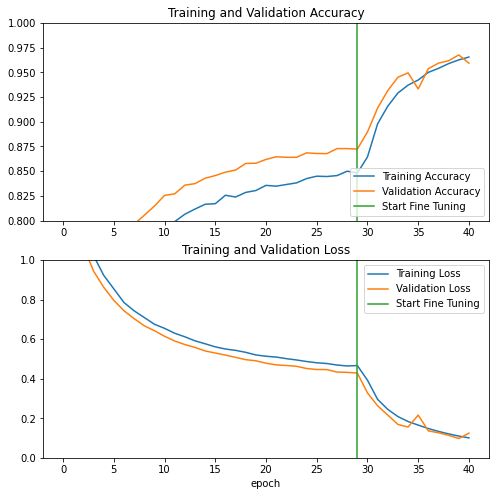

In [ ]:

loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)


246/246 [==============================] - 11s 42ms/step - loss: 0.1247 - accuracy: 0.9593
Test accuracy : 0.9593164324760437

**Load/Save Model**

In [ ]:
model.save('saved_models/model_finetune/', save_format='tf')


INFO:tensorflow:Assets written to: saved_models/model_finetune/assets


In [ ]:
!ls saved_models/model_finetune/


assets	saved_model.pb	variables

In [ ]:
!zip model_finetune.zip -r saved_models/model_finetune/

adding: saved_models/model_finetune/ (stored 0%)
  adding: saved_models/model_finetune/variables/ (stored 0%)
  adding: saved_models/model_finetune/variables/variables.index (deflated 77%)
  adding: saved_models/model_finetune/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_models/model_finetune/assets/ (stored 0%)
  adding: saved_models/model_finetune/saved_model.pb (deflated 92%)

In [ ]:
!cp ./model_finetune.zip /content/gdrive/MyDrive/'Colab Notebooks'/Kaggle


In [ ]:
from google.colab import files
files.download('model_finetune.zip')

<IPython.core.display.Javascript object>
<IPython.core.display.Javascript object>

In [ ]:
model.save('model_finetune.h5')

In [ ]:

newsaved_model = tf.keras.models.load_model('saved_models/model_finetune/')



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 43)                55083     
=================================================================
Total params: 2,313,067
Trainable params: 2,278,955
Non-trainable params: 34,112

**Model Evaluation**

In [ ]:
image_batch, label_batch = val_ds.as_numpy_iterator().next()

In [ ]:
label_batch

array([29, 34, 41, 32, 23, 29, 10, 42, 34,  9,  3, 41,  9, 34,  3,  2, 34,
       28, 11, 25,  2, 34,  3, 34,  8, 12, 41,  1,  5,  1, 29, 34],
      dtype=int32)

In [ ]:
predictions = newsaved_model.predict_on_batch(image_batch) #.flatten()
predictions


array([[-27.538647 , -19.5644   , -17.22286  , ..., -31.247295 ,
        -24.498861 , -12.448724 ],
       [ -7.3609467,  -6.827816 , -16.541307 , ..., -14.718191 ,
         -8.143978 ,  -9.678493 ],
       [-13.308262 ,  -5.2227097, -14.611705 , ...,  -2.990856 ,
          6.8962083, -11.1589   ],
       ...,
       [ -9.197577 ,   2.210507 , -22.090143 , ..., -21.228184 ,
        -17.428072 , -18.24594  ],
       [-23.706207 , -17.250109 , -19.169268 , ..., -24.95388  ,
        -23.784258 , -15.440981 ],
       [-10.20395  ,  -5.6916246,  -8.72673  , ...,  -5.404183 ,
         -5.8456054,  -9.520733 ]], dtype=float32)

In [ ]:
predictions = model.predict_on_batch(image_batch) #.flatten()
predictions

array([[-27.538647 , -19.5644   , -17.22286  , ..., -31.247295 ,
        -24.498861 , -12.448724 ],
       [ -7.3609467,  -6.827816 , -16.541307 , ..., -14.718191 ,
         -8.143978 ,  -9.678493 ],
       [-13.308262 ,  -5.2227097, -14.611705 , ...,  -2.990856 ,
          6.8962083, -11.1589   ],
       ...,
       [ -9.197577 ,   2.210507 , -22.090143 , ..., -21.228184 ,
        -17.428072 , -18.24594  ],
       [-23.706207 , -17.250109 , -19.169268 , ..., -24.95388  ,
        -23.784258 , -15.440981 ],
       [-10.20395  ,  -5.6916246,  -8.72673  , ...,  -5.404183 ,
         -5.8456054,  -9.520733 ]], dtype=float32)

In [ ]:
predictions.shape

(32, 43)

In [ ]:

predictions[0].shape

(43,)


In [ ]:
prediction0 = tf.nn.softmax(predictions[0])
prediction0

<tf.Tensor: shape=(43,), dtype=float32, numpy=
array([1.9868625e-14, 5.7721723e-11, 6.0014604e-10, 1.9998194e-07,
       2.9266875e-13, 2.1015456e-10, 1.1852609e-14, 8.4267052e-14,
       4.3079627e-11, 1.1551834e-11, 7.2453901e-09, 8.8995054e-11,
       2.8008932e-11, 1.7235333e-12, 1.7073863e-12, 9.2570890e-12,
       5.4248983e-10, 1.4152476e-10, 2.4429722e-08, 4.5475863e-13,
       1.9579968e-10, 2.2072788e-14, 1.4246671e-14, 6.2784760e-13,
       1.9886889e-15, 7.9830318e-12, 3.8727334e-11, 6.2595427e-07,
       3.4790793e-07, 9.9998713e-01, 1.3784685e-07, 1.3317755e-07,
       1.1402966e-05, 6.5476375e-09, 2.9145564e-08, 1.7026611e-08,
       1.2417876e-10, 4.3656595e-10, 8.3048034e-17, 1.0806301e-14,
       4.8699238e-16, 4.1526935e-13, 7.1062033e-08], dtype=float32)>

In [ ]:
objid=np.argmax(prediction0, axis=-1)
objid

29

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  prediction_current = tf.nn.softmax(predictions[i])
  objid=np.argmax(prediction_current, axis=-1)
  groundtruth=labels[label_batch[i]]
  plt.title(labels[objid]+',L:'+groundtruth)
  plt.axis("off")

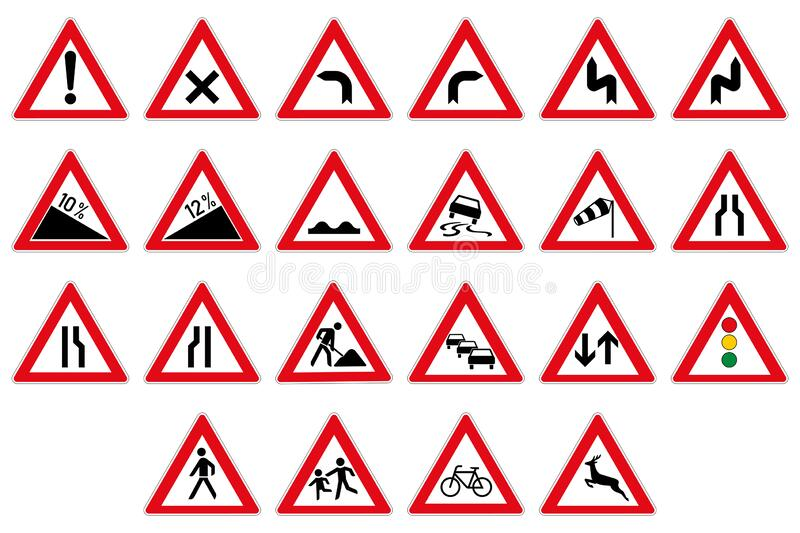

In [ ]:

from numpy import asarray
from PIL import Image
# load image
image_path = 'testspeedlimit30km.jpg'
image = Image.open(image_path)
im_resized = image.resize((img_width, img_height))
pixels = asarray(im_resized)
img_array = tf.expand_dims(pixels, 0) # Create a batch
predictions = newsaved_model.predict(img_array)
prediction_prob=tf.nn.softmax(predictions)
prediction_prob

<tf.Tensor: shape=(1, 43), dtype=float32, numpy=
array([[5.1368200e-08, 6.7353189e-01, 3.8509075e-02, 6.4369491e-03,
        1.5231308e-05, 1.2236483e-02, 5.7530256e-06, 8.4023782e-08,
        2.1192123e-05, 3.1931384e-05, 1.2869771e-04, 1.2678646e-01,
        3.4303408e-02, 8.0553364e-06, 3.4157027e-04, 7.0032757e-04,
        4.7038130e-02, 4.2234869e-06, 2.2115407e-03, 6.2145300e-05,
        2.2761806e-06, 1.9299256e-05, 9.1573975e-06, 6.7804381e-04,
        2.1433813e-02, 1.6640893e-03, 3.2219744e-11, 4.7823796e-03,
        1.5889273e-03, 1.9246495e-06, 7.4608721e-07, 1.0463664e-05,
        4.6490648e-05, 9.4471073e-07, 1.4356110e-05, 1.0828317e-05,
        1.7862104e-09, 2.4820156e-11, 2.1190833e-02, 1.3905289e-09,
        1.1302632e-06, 6.1399597e-03, 3.1111656e-05]], dtype=float32)>

In [ ]:
objid=np.argmax(prediction_prob[0], axis=-1)
labels[objid]

'Speed Limit (30Km/H)'

**Tensorflow Resnet**

In [ ]:

import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
base_dir = '/content/datasets/layover/traffic-signal/Train'
print(base_dir)

In [ ]:
batch_size = 32
img_height = 224 #180
img_width = 224 #180
IMAGE_SIZE = (img_height, img_width

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = np.array(train_ds.class_names)
print(class_names)


['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 224, 224, 3)
(32,)

In [ ]:
numclasses=len(class_names)
def create_model():
    IMAGE_SIZE = (img_height, img_width)
    IMG_SHAPE = IMAGE_SIZE + (3,)
    pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False, weights='imagenet')
    #pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    #pretrained_model = tf.keras.applications.Xception(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    #pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
    #pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    #pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    # EfficientNet can be loaded through efficientnet.tfkeras library (https://github.com/qubvel/efficientnet)
    #pretrained_model = efficientnet.tfkeras.EfficientNetB0(weights='imagenet', include_top=False)

    #tf.keras.applications.MobileNetV2 for use as your base model, This model expects pixel vaues in [-1,1]
    preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

    data_augmentation = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ])
    
    pretrained_model.trainable = False

    header = tf.keras.Sequential([
        tf.keras.layers.GlobalAveragePooling2D(),
        #tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(numclasses, activation='softmax', dtype=tf.float32) # the float32 is needed on softmax layer when using mixed precision
    ])

    inputs = tf.keras.Input(shape=IMG_SHAPE)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = pretrained_model(x, training=False)
    outputs = header(x)
    model = tf.keras.Model(inputs, outputs)

    base_learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [ ]:

model3 = create_model()
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_10 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_2 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
sequential_12 (Sequential)   (None, 43)                55083     
=================================================================
Total params: 2,313,067
Trainable params: 55,083
Non-trainable params: 2,257,984

In [ ]:
import time
start_time = time.time()
EPOCHS=30
history = model3.fit(train_ds, validation_data=val_ds,epochs=EPOCHS)

final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
print("TRAINING TIME: ", time.time() - start_time, " sec")

Epoch 1/30
981/981 [==============================] - 37s 36ms/step - loss: 3.0085 - accuracy: 0.2147 - val_loss: 1.6593 - val_accuracy: 0.5172
Epoch 2/30
981/981 [==============================] - 26s 27ms/step - loss: 1.5471 - accuracy: 0.5302 - val_loss: 1.2721 - val_accuracy: 0.6256
Epoch 3/30
981/981 [==============================] - 26s 26ms/step - loss: 1.2268 - accuracy: 0.6191 - val_loss: 1.0725 - val_accuracy: 0.6842
Epoch 4/30
981/981 [==============================] - 26s 26ms/step - loss: 1.0535 - accuracy: 0.6727 - val_loss: 0.9483 - val_accuracy: 0.7201
Epoch 5/30
981/981 [==============================] - 26s 26ms/step - loss: 0.9490 - accuracy: 0.7005 - val_loss: 0.8620 - val_accuracy: 0.7430
Epoch 6/30
981/981 [==============================] - 26s 26ms/step - loss: 0.8656 - accuracy: 0.7259 - val_loss: 0.7939 - val_accuracy: 0.7653
Epoch 7/30
981/981 [==============================] - 26s 26ms/step - loss: 0.8116 - accuracy: 0.7455 - val_loss: 0.7429 - val_accuracy: 0.7829
Epoch 8/30
981/981 [==============================] - 26s 26ms/step - loss: 0.7595 - accuracy: 0.7567 - val_loss: 0.7025 - val_accuracy: 0.7929
Epoch 9/30
981/981 [==============================] - 26s 26ms/step - loss: 0.7277 - accuracy: 0.7704 - val_loss: 0.6684 - val_accuracy: 0.8037
Epoch 10/30
981/981 [==============================] - 26s 27ms/step - loss: 0.6940 - accuracy: 0.7806 - val_loss: 0.6426 - val_accuracy: 0.8114
Epoch 11/30
981/981 [==============================] - 26s 26ms/step - loss: 0.6578 - accuracy: 0.7906 - val_loss: 0.6184 - val_accuracy: 0.8193
Epoch 12/30
981/981 [==============================] - 26s 26ms/step - loss: 0.6459 - accuracy: 0.7933 - val_loss: 0.5935 - val_accuracy: 0.8250
Epoch 13/30
981/981 [==============================] - 26s 26ms/step - loss: 0.6152 - accuracy: 0.8056 - val_loss: 0.5716 - val_accuracy: 0.8325
Epoch 14/30
981/981 [==============================] - 26s 26ms/step - loss: 0.6005 - accuracy: 0.8088 - val_loss: 0.5565 - val_accuracy: 0.8356
Epoch 15/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5891 - accuracy: 0.8103 - val_loss: 0.5447 - val_accuracy: 0.8368
Epoch 16/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5649 - accuracy: 0.8195 - val_loss: 0.5302 - val_accuracy: 0.8435
Epoch 17/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5517 - accuracy: 0.8268 - val_loss: 0.5206 - val_accuracy: 0.8430
Epoch 18/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5402 - accuracy: 0.8269 - val_loss: 0.5090 - val_accuracy: 0.8480
Epoch 19/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5382 - accuracy: 0.8256 - val_loss: 0.4947 - val_accuracy: 0.8510
Epoch 20/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5245 - accuracy: 0.8285 - val_loss: 0.4895 - val_accuracy: 0.8540
Epoch 21/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5196 - accuracy: 0.8323 - val_loss: 0.4799 - val_accuracy: 0.8583
Epoch 22/30
981/981 [==============================] - 26s 27ms/step - loss: 0.5160 - accuracy: 0.8370 - val_loss: 0.4760 - val_accuracy: 0.8593
Epoch 23/30
981/981 [==============================] - 26s 26ms/step - loss: 0.5062 - accuracy: 0.8372 - val_loss: 0.4679 - val_accuracy: 0.8596
Epoch 24/30
981/981 [==============================] - 26s 26ms/step - loss: 0.4985 - accuracy: 0.8401 - val_loss: 0.4614 - val_accuracy: 0.8612
Epoch 25/30
981/981 [==============================] - 26s 26ms/step - loss: 0.4947 - accuracy: 0.8391 - val_loss: 0.4512 - val_accuracy: 0.8681
Epoch 26/30
981/981 [==============================] - 26s 26ms/step - loss: 0.4837 - accuracy: 0.8413 - val_loss: 0.4502 - val_accuracy: 0.8623
Epoch 27/30
981/981 [==============================] - 26s 27ms/step - loss: 0.4839 - accuracy: 0.8407 - val_loss: 0.4471 - val_accuracy: 0.8652
Epoch 28/30
981/981 [==============================] - 26s 26ms/step - loss: 0.4716 - accuracy: 0.8465 - val_loss: 0.4395 - val_accuracy: 0.8670
Epoch 29/30
981/981 [==============================] - 26s 26ms/step - loss: 0.4689 - accuracy: 0.8470 - val_loss: 0.4301 - val_accuracy: 0.8699
Epoch 30/30
981/981 [==============================] - 26s 26ms/step - loss: 0.4632 - accuracy: 0.8503 - val_loss: 0.4292 - val_accuracy: 0.8694
FINAL ACCURACY MEAN-5:  0.8667516946792603
TRAINING TIME:  788.7620420455933  sec

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

plot_history(history, 'accuracy', 'val_accuracy')

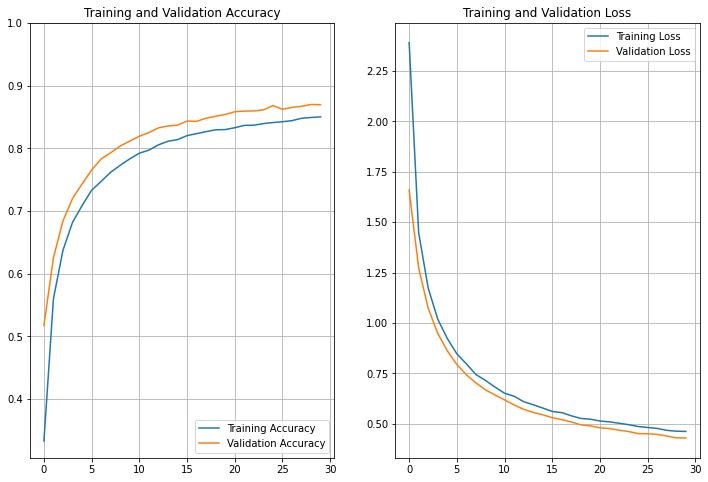

**ResNet Model**

In [ ]:
numclasses=len(class_names)
def create_model2():
    IMAGE_SIZE = (img_height, img_width)
    IMG_SHAPE = IMAGE_SIZE + (3,)
    #pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False, weights='imagenet')
    #pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    #pretrained_model = tf.keras.applications.Xception(input_shape=[*IMAGE_SIZE, 3], include_top=False)
    #pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
    pretrained_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3]) #https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50V2
    #pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    # EfficientNet can be loaded through efficientnet.tfkeras library (https://github.com/qubvel/efficientnet)
    #pretrained_model = efficientnet.tfkeras.EfficientNetB0(weights='imagenet', include_top=False)

    #tf.keras.applications.MobileNetV2 for use as your base model, This model expects pixel vaues in [-1,1]
    #preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
    #preprocess_input = tf.keras.applications.ResNet50V2.preprocess_input
    preprocess_input = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      #tf.keras.applications.ResNet50V2.preprocess_input,
    ])

    data_augmentation = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    ])
    
    pretrained_model.trainable = False

    header = tf.keras.Sequential([
        tf.keras.layers.GlobalAveragePooling2D(),
        #tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(numclasses, activation='softmax', dtype=tf.float32) # the float32 is needed on softmax layer when using mixed precision
    ])

    inputs = tf.keras.Input(shape=IMG_SHAPE)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = pretrained_model(x, training=False)
    outputs = header(x)
    model = tf.keras.Model(inputs, outputs)

    base_learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [ ]:
model4 = create_model2()
model4.summary()


Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5
94674944/94668760 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
sequential_2 (Sequential)    (None, 43)                88107     
=================================================================
Total params: 23,652,907
Trainable params: 88,107
Non-trainable params: 23,564,800

In [ ]:
import time
start_time = time.time()
EPOCHS=30
history4 = model4.fit(train_ds, validation_data=val_ds,epochs=EPOCHS)

final_accuracy = history4.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
print("TRAINING TIME: ", time.time() - start_time, " sec")

Epoch 1/30
981/981 [==============================] - 65s 60ms/step - loss: 2.8768 - accuracy: 0.2361 - val_loss: 1.6736 - val_accuracy: 0.5189
Epoch 2/30
981/981 [==============================] - 50s 51ms/step - loss: 1.4228 - accuracy: 0.5820 - val_loss: 1.2752 - val_accuracy: 0.6382
Epoch 3/30
981/981 [==============================] - 49s 50ms/step - loss: 1.1155 - accuracy: 0.6626 - val_loss: 1.0813 - val_accuracy: 0.6975
Epoch 4/30
981/981 [==============================] - 50s 51ms/step - loss: 0.9599 - accuracy: 0.7108 - val_loss: 0.9655 - val_accuracy: 0.7254
Epoch 5/30
981/981 [==============================] - 50s 51ms/step - loss: 0.8573 - accuracy: 0.7405 - val_loss: 0.8784 - val_accuracy: 0.7532
Epoch 6/30
981/981 [==============================] - 50s 51ms/step - loss: 0.7807 - accuracy: 0.7647 - val_loss: 0.8131 - val_accuracy: 0.7721
Epoch 7/30
981/981 [==============================] - 50s 51ms/step - loss: 0.7284 - accuracy: 0.7766 - val_loss: 0.7652 - val_accuracy: 0.7819
Epoch 8/30
981/981 [==============================] - 50s 51ms/step - loss: 0.6957 - accuracy: 0.7862 - val_loss: 0.7223 - val_accuracy: 0.7986
Epoch 9/30
981/981 [==============================] - 50s 51ms/step - loss: 0.6565 - accuracy: 0.8029 - val_loss: 0.6898 - val_accuracy: 0.8042
Epoch 10/30
981/981 [==============================] - 50s 50ms/step - loss: 0.6220 - accuracy: 0.8114 - val_loss: 0.6627 - val_accuracy: 0.8124
Epoch 11/30
981/981 [==============================] - 50s 51ms/step - loss: 0.6016 - accuracy: 0.8149 - val_loss: 0.6341 - val_accuracy: 0.8244
Epoch 12/30
981/981 [==============================] - 49s 50ms/step - loss: 0.5756 - accuracy: 0.8238 - val_loss: 0.6156 - val_accuracy: 0.8288
Epoch 13/30
981/981 [==============================] - 49s 50ms/step - loss: 0.5591 - accuracy: 0.8316 - val_loss: 0.5946 - val_accuracy: 0.8342
Epoch 14/30
981/981 [==============================] - 50s 51ms/step - loss: 0.5433 - accuracy: 0.8336 - val_loss: 0.5760 - val_accuracy: 0.8394
Epoch 15/30
981/981 [==============================] - 50s 51ms/step - loss: 0.5260 - accuracy: 0.8410 - val_loss: 0.5631 - val_accuracy: 0.8430
Epoch 16/30
981/981 [==============================] - 50s 51ms/step - loss: 0.5131 - accuracy: 0.8429 - val_loss: 0.5471 - val_accuracy: 0.8476
Epoch 17/30
981/981 [==============================] - 49s 50ms/step - loss: 0.5029 - accuracy: 0.8456 - val_loss: 0.5354 - val_accuracy: 0.8494
Epoch 18/30
981/981 [==============================] - 50s 51ms/step - loss: 0.4907 - accuracy: 0.8499 - val_loss: 0.5239 - val_accuracy: 0.8519
Epoch 19/30
981/981 [==============================] - 50s 51ms/step - loss: 0.4787 - accuracy: 0.8539 - val_loss: 0.5138 - val_accuracy: 0.8550
Epoch 20/30
981/981 [==============================] - 49s 50ms/step - loss: 0.4706 - accuracy: 0.8557 - val_loss: 0.5061 - val_accuracy: 0.8581
Epoch 21/30
981/981 [==============================] - 50s 51ms/step - loss: 0.4670 - accuracy: 0.8575 - val_loss: 0.4952 - val_accuracy: 0.8589
Epoch 22/30
981/981 [==============================] - 49s 50ms/step - loss: 0.4585 - accuracy: 0.8599 - val_loss: 0.4886 - val_accuracy: 0.8614
Epoch 23/30
981/981 [==============================] - 50s 51ms/step - loss: 0.4484 - accuracy: 0.8595 - val_loss: 0.4817 - val_accuracy: 0.8616
Epoch 24/30
981/981 [==============================] - 49s 50ms/step - loss: 0.4415 - accuracy: 0.8648 - val_loss: 0.4734 - val_accuracy: 0.8638
Epoch 25/30
981/981 [==============================] - 49s 50ms/step - loss: 0.4399 - accuracy: 0.8650 - val_loss: 0.4649 - val_accuracy: 0.8683
Epoch 26/30
981/981 [==============================] - 50s 51ms/step - loss: 0.4330 - accuracy: 0.8662 - val_loss: 0.4610 - val_accuracy: 0.8695
Epoch 27/30
981/981 [==============================] - 49s 50ms/step - loss: 0.4276 - accuracy: 0.8634 - val_loss: 0.4528 - val_accuracy: 0.8712
Epoch 28/30
981/981 [==============================] - 49s 50ms/step - loss: 0.4174 - accuracy: 0.8728 - val_loss: 0.4479 - val_accuracy: 0.8709
Epoch 29/30
981/981 [==============================] - 50s 51ms/step - loss: 0.4093 - accuracy: 0.8723 - val_loss: 0.4420 - val_accuracy: 0.8750
Epoch 30/30
981/981 [==============================] - 49s 50ms/step - loss: 0.4126 - accuracy: 0.8697 - val_loss: 0.4360 - val_accuracy: 0.8758
FINAL ACCURACY MEAN-5:  0.8724907517433167
TRAINING TIME:  1504.4362773895264  sec

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

plot_history(history4, 'accuracy', 'val_accuracy')

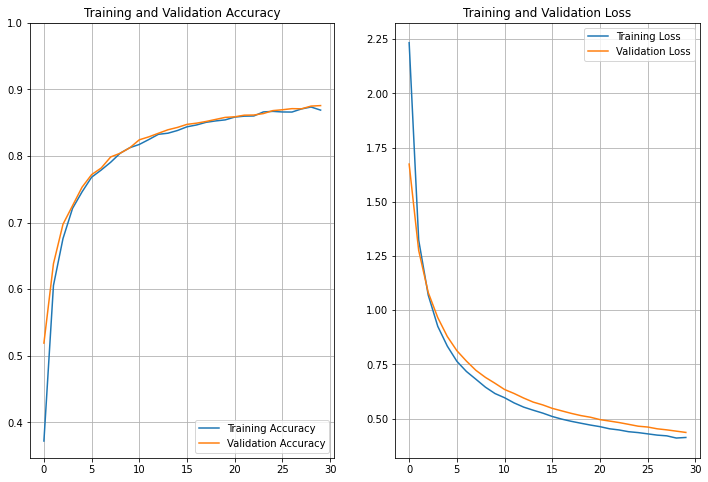

**Finetune ResNet**

In [ ]:
print("Model Layers: ", len(model4.layers))

Model Layers: 5

In [ ]:

model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
sequential_2 (Sequential)    (None, 43)                88107     
=================================================================
Total params: 23,652,907
Trainable params: 88,107
Non-trainable params: 23,564,800

In [ ]:
model4_base=model4.layers[3]

In [ ]:
print("Model Layers: ", len(model4_base.layers))

Model Layers: 190

In [ ]:
for layer in model4_base.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [ ]:
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer, fine tune layers after
for layer in model4.layers[3].layers[fine_tune_at:]:
  layer.trainable =  True #False

In [ ]:
for layer in model4.layers[3].layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

In [ ]:
model4.layers[3].trainable = True

In [ ]:
model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
sequential_2 (Sequential)    (None, 43)                88107     
=================================================================
Total params: 23,652,907
Trainable params: 23,607,467
Non-trainable params: 45,440

In [ ]:
base_learning_rate = 0.0001
model4.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10),
          #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
sequential_2 (Sequential)    (None, 43)                88107     
=================================================================
Total params: 23,652,907
Trainable params: 23,607,467
Non-trainable params: 45,440

In [ ]:
len(model4.trainable_variables)

174

In [ ]:
history4.epoch[-1]

29

In [ ]:
fine_tune_epochs = 10
initial_epochs = 30
total_epochs =  initial_epochs + fine_tune_epochs

history4_fine = model4.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history4.epoch[-1],
                         validation_data=val_ds)

Epoch 30/40
981/981 [==============================] - 121s 119ms/step - loss: 0.2781 - accuracy: 0.9045 - val_loss: 0.0959 - val_accuracy: 0.9668
Epoch 31/40
981/981 [==============================] - 116s 118ms/step - loss: 0.1082 - accuracy: 0.9617 - val_loss: 0.0746 - val_accuracy: 0.9733
Epoch 32/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0687 - accuracy: 0.9768 - val_loss: 0.0838 - val_accuracy: 0.9689
Epoch 33/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0579 - accuracy: 0.9804 - val_loss: 0.0321 - val_accuracy: 0.9879
Epoch 34/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0391 - val_accuracy: 0.9865
Epoch 35/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0357 - accuracy: 0.9869 - val_loss: 0.0357 - val_accuracy: 0.9881
Epoch 36/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0265 - accuracy: 0.9907 - val_loss: 0.0182 - val_accuracy: 0.9934
Epoch 37/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 38/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0235 - accuracy: 0.9919 - val_loss: 0.0178 - val_accuracy: 0.9925
Epoch 39/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0174 - val_accuracy: 0.9948
Epoch 40/40
981/981 [==============================] - 116s 118ms/step - loss: 0.0191 - accuracy: 0.9928 - val_loss: 0.0115 - val_accuracy: 0.9962

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

In [ ]:

acc += history4_fine.history['accuracy']
val_acc += history4_fine.history['val_accuracy']

loss += history4_fine.history['loss']
val_loss += history4_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

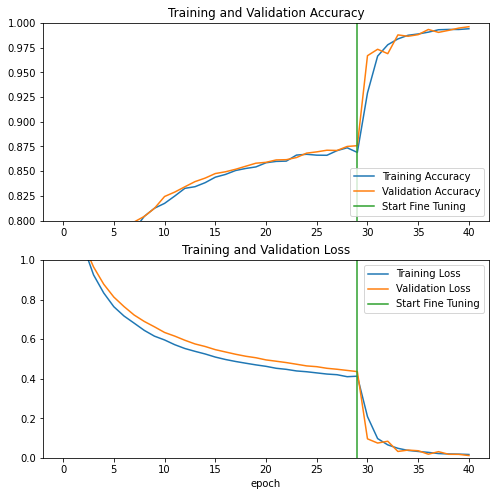

In [ ]:

loss, accuracy = model4.evaluate(val_ds)
print('Test accuracy :', accuracy)


246/246 [==============================] - 16s 65ms/step - loss: 0.0115 - accuracy: 0.9962
Test accuracy : 0.9961739778518677

In [ ]:

model4.save('saved_models/resnet50model_finetune/', save_format='tf')


INFO:tensorflow:Assets written to: saved_models/resnet50model_finetune/assets

In [ ]:

from google.colab import files
files.download('resnet50model_finetune.zip')


<IPython.core.display.Javascript object>
<IPython.core.display.Javascript object>

**Evaluation**

In [ ]:
image_batch, label_batch = val_ds.as_numpy_iterator().next()

In [ ]:
predicted_batch = model4.predict(image_batch)
predicted_batch

array([[9.97264100e-17, 4.91733034e-15, 3.31343852e-15, ...,
        1.30889764e-20, 4.86355151e-13, 7.60824373e-14],
       [3.25026685e-16, 6.67909006e-10, 4.29520447e-10, ...,
        2.64108107e-21, 4.85966836e-16, 9.37579766e-13],
       [9.15642538e-20, 5.42133537e-22, 7.36318627e-18, ...,
        1.99491525e-22, 1.35399101e-19, 1.12606434e-15],
       ...,
       [2.36718067e-12, 4.10380985e-13, 4.30961820e-12, ...,
        1.27608378e-18, 5.45140715e-14, 3.50694273e-13],
       [9.00909194e-23, 1.47200681e-16, 6.29000248e-17, ...,
        6.15737536e-21, 2.66955059e-16, 3.15464398e-16],
       [1.00170744e-21, 1.88626411e-14, 5.64097103e-16, ...,
        1.67128069e-18, 2.60059562e-14, 1.87306361e-14]], dtype=float32)

In [ ]:

predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_id

array  ( [32, 39, 10,  2, 29, 29, 25,  2,  5,  9, 22, 32, 32, 29, 34, 24, 12,
        9, 25,  1, 12, 42,  6, 40, 16, 32,  9, 38,  4, 19,  9,  9] )

In [ ]:
predicted_label_batch = labels[predicted_id[0]]
predicted_label_batch

'End of the limits'

In [ ]:

plt.figure(figsize=(20, 40))
plt.subplots_adjust(hspace=1)
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(image_batch[i].astype("uint8"))
  prediction_current = tf.nn.softmax(predicted_batch[i])
  objid=np.argmax(prediction_current, axis=-1)
  groundtruth=labels[label_batch[i]]
  plt.title(labels[objid]+',L:'+groundtruth)
  plt.axis("off")

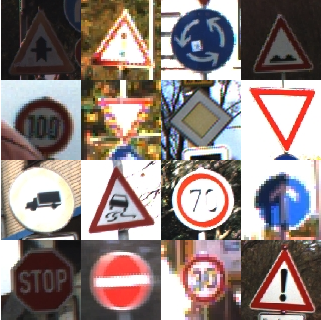

In [ ]:

test_df = pd.read_csv('Test.csv')
# display a sneak peek of the data
test_df.head()

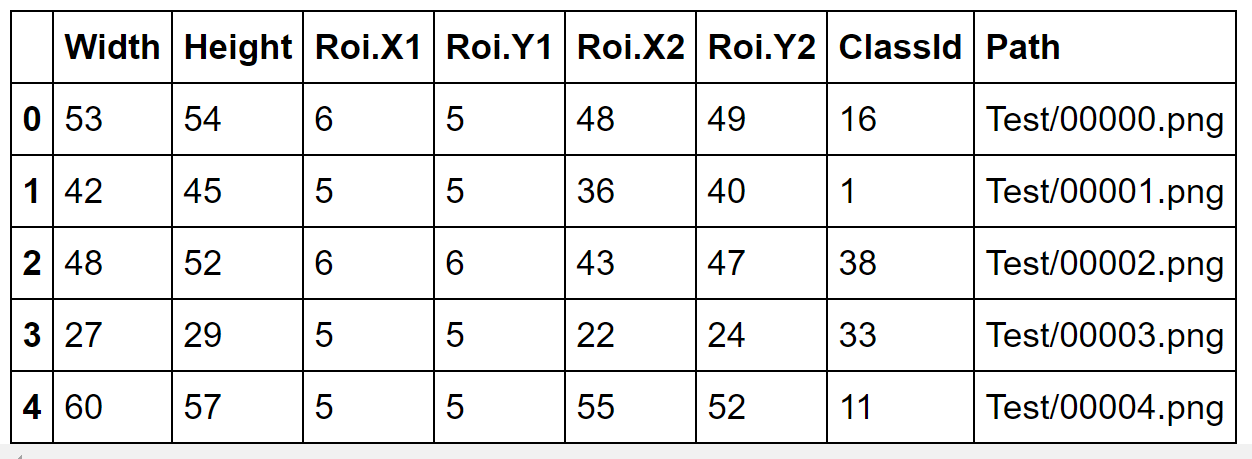

In [ ]:
labels[5]

'50 km/h'

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
image_path="Test/00005.png"
image = Image.open(image_path).resize((img_width, img_height))
plt.imshow(image)

<matplotlib.image.AxesImage at 0x7f6d44c78c18>


**TF LITE**

In [ ]:
import tensorflow as tf
saved_model_dir = 'saved_models/resnet50model_finetune/'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

94432008

In [ ]:
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_shape

array([  1, 224, 224,   3], dtype=int32)

In [ ]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'serving_default_input_2:0',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([ -1, 224, 224,   3], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:

from numpy import asarray
from PIL import Image
# load image
image_path = 'testspeedlimit30km.jpg'#'/content/road_sign_C14_30_kmh.jpg'
image = Image.open(image_path).resize((img_width, img_height))
image = np.array(image)
input=image[np.newaxis, ...]

In [ ]:

input.shape

(1, 224, 224, 3)

In [ ]:
input_data = np.array(input, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


[[4.48122248e-03 9.36675489e-01 1.41397938e-09 1.43852730e-09
  1.56012021e-08 1.06538674e-10 4.98676700e-09 1.57595535e-13
  7.68972974e-09 3.16878576e-12 9.06395584e-11 1.59588021e-09
  5.87560199e-02 4.99102759e-10 7.64483730e-08 3.71928668e-11
  3.82352340e-07 1.24366828e-11 7.45561168e-10 1.47119014e-12
  9.06831416e-11 1.84819218e-08 6.33002060e-13 2.38702250e-05
  1.53882603e-13 7.32261691e-13 1.01843359e-13 5.50940895e-05
  5.99441297e-09 1.29770743e-11 8.67142713e-09 1.85511939e-10
  1.73260901e-07 3.77787387e-06 1.20449056e-06 1.11762699e-06
  1.10238147e-08 9.32418254e-10 4.58415172e-07 6.77242359e-11
  1.08873891e-11 8.30772728e-10 1.14462296e-06]]

In [ ]:
labels[np.argmax(output_data[0], axis=-1)]

'50 km/h'

**Integer Quantization for Post-training Model**

In [ ]:
for image_batch, label_batch in val_ds.take(100):
  pass

image_batch.shape

TensorShape([32, 224, 224, 3])

In [ ]:
def representative_data_gen():
  for input_value, _ in val_ds.take(100):
    yield [input_value]

In [ ]:

saved_model_dir = 'saved_models/resnet50model_finetune/'
converter_int8 = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter_int8.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
converter_int8.representative_dataset = representative_data_gen

In [ ]:
converter_int8.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

In [ ]:

tflite_model = converter.convert()
tflite_model_file = 'converted_model_quant.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

In [ ]:

try:
  from google.colab import files
  files.download('converted_model_quant.tflite')
except:
  pass


<IPython.core.display.Javascript object>
<IPython.core.display.Javascript object>

In [ ]:
interpreter_quant = tf.lite.Interpreter(model_path="converted_model_quant.tflite")
interpreter_quant.allocate_tensors()

# Get input and output tensors.
input_details = interpreter_quant.get_input_details()
output_details = interpreter_quant.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_shape


array([  1, 224, 224,   3], dtype=int32)

In [ ]:

from numpy import asarray
from PIL import Image
# load image
image_path = 'testspeedlimit30km.jpg'#'/content/road_sign_C14_30_kmh.jpg'
image = Image.open(image_path).resize((img_width, img_height))
image = np.array(image)
input=image[np.newaxis, ...]
#image = tf.cast(input, tf.float32)

In [ ]:
input_data = np.array(input, dtype=np.float32)
interpreter_quant.set_tensor(input_details[0]['index'], input_data)

interpreter_quant.invoke()
output_data = interpreter_quant.get_tensor(output_details[0]['index'])
print(output_data)



[[4.48122248e-03 9.36675489e-01 1.41397938e-09 1.43852730e-09
  1.56012021e-08 1.06538674e-10 4.98676700e-09 1.57595535e-13
  7.68972974e-09 3.16878576e-12 9.06395584e-11 1.59588021e-09
  5.87560199e-02 4.99102759e-10 7.64483730e-08 3.71928668e-11
  3.82352340e-07 1.24366828e-11 7.45561168e-10 1.47119014e-12
  9.06831416e-11 1.84819218e-08 6.33002060e-13 2.38702250e-05
  1.53882603e-13 7.32261691e-13 1.01843359e-13 5.50940895e-05
  5.99441297e-09 1.29770743e-11 8.67142713e-09 1.85511939e-10
  1.73260901e-07 3.77787387e-06 1.20449056e-06 1.11762699e-06
  1.10238147e-08 9.32418254e-10 4.58415172e-07 6.77242359e-11
  1.08873891e-11 8.30772728e-10 1.14462296e-06]]

In [ ]:
labels[np.argmax(output_data[0], axis=-1)]

'50 km/h'